In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.colors as colors
import numpy as np
import json
from collections import defaultdict
import seaborn as sns
from tabulate import tabulate

In [2]:
# methods = ["WSELECT1", "WSELECT2", "WSELECT3", "CDFS", "CBFS", "CSTOCH1", "CSTOCH2", "CSTOCH3", "STOCH"]
methods = ["CDFS"]
# colors=["#006BA4","#FF800E","#ABABAB","#5F9ED1","#CFCFCF","#C85200","#898989","#A2C8EC","#FFBC79"]
colors=["#006BA4","#FF800E","#A2C8EC","#C85200","#5F9ED1","#CFCFCF","#898989","#ABABAB","#FFBC79"]

df_original_1 = pd.read_csv('./src/output/gnn_eval/randgnn_eval_stats.csv')
df_original = df_original_1.loc[df_original_1["method"]== "CDFS"]
print(df_original)

     traning_time   flag graph_model iter method classifier num_layers  \
0          859.64  False          ER    0   CDFS     rginjk          4   
2          844.00  False          ER    1   CDFS     rginjk          4   
3          893.56  False          ER    1   CDFS     fginjk          4   
4          802.00  False          ER    2   CDFS     rginjk          4   
5          882.27  False          ER    2   CDFS     fginjk          4   
..            ...    ...         ...  ...    ...        ...        ...   
180          8.46   True          ER    0   CDFS         wl          0   
181          7.74   True          ER    0   CDFS         wl          0   
182          7.83   True          ER    0   CDFS         wl          0   
183          7.71   True          ER    0   CDFS         wl          0   
184          6.97   True          ER    0   CDFS         wl          0   

       split   accuracy  balanced_accuracy  precision     recall   f1_score  
0    split_0  90.000000          

In [3]:
metrics = ["accuracy","balanced_accuracy","precision","recall","traning_time","f1_score"]

In [4]:
clean_df = df_original.loc[df_original["classifier"]== "rginjk"]
std_data = clean_df.groupby(['classifier', 'method', 'flag', 'split'])[metrics[1]].std()
print(std_data)

std_data = clean_df.groupby(['classifier', 'method', 'flag', 'split'])[metrics[-1]].std()

print(std_data)

classifier  method  flag   split  
rginjk      CDFS    False  split_0    2.236068
                           split_1    2.695128
                           split_2    1.763834
                           split_3    1.313510
                           split_4    2.048034
                    True   split_0    2.449490
                           split_1    1.218147
                           split_2    4.901814
                           split_3    2.315407
                           split_4    1.658312
Name: balanced_accuracy, dtype: float64
classifier  method  flag   split  
rginjk      CDFS    False  split_0    2.610677
                           split_1    2.751582
                           split_2    1.790330
                           split_3    1.587026
                           split_4    2.241786
                    True   split_0    2.735472
                           split_1    1.283277
                           split_2    5.432741
                           split_3    2.3774

In [5]:
clean_df = df_original.loc[df_original["classifier"]== "fginjk"]
std_data = clean_df.groupby(['classifier', 'method', 'flag', 'split'])[metrics[1]].std()
print(std_data)

std_data = clean_df.groupby(['classifier', 'method', 'flag', 'split'])[metrics[-1]].std()

print(std_data)

classifier  method  flag   split  
fginjk      CDFS    False  split_0    1.642081
                           split_1    1.856845
                           split_2    2.048034
                           split_3    1.201850
                           split_4    0.000000
                    True   split_0    1.414214
                           split_1    1.394925
                           split_2    1.763834
                           split_3    1.589899
                           split_4    0.877434
Name: balanced_accuracy, dtype: float64
classifier  method  flag   split  
fginjk      CDFS    False  split_0    1.874096
                           split_1    1.907936
                           split_2    1.840019
                           split_3    1.162326
                           split_4    0.031136
                    True   split_0    1.613763
                           split_1    1.316707
                           split_2    1.629270
                           split_3    1.5713

In [6]:
clean_df = df_original.loc[df_original["classifier"]== "rginjk"]
std_data = clean_df.groupby(['classifier', 'method', 'flag', 'num_layers'])[metrics[1]].std()
print("balanced_accuracy")
print(std_data)

std_data = clean_df.groupby(['classifier', 'method', 'flag', 'num_layers'])[metrics[-1]].std()
print("f1_score")
print(std_data)

balanced_accuracy
classifier  method  flag   num_layers
rginjk      CDFS    False  4             2.744199
                           6             2.585470
                           8             1.687802
                    True   4             3.669552
                           6             3.014330
                           8             2.692817
Name: balanced_accuracy, dtype: float64
f1_score
classifier  method  flag   num_layers
rginjk      CDFS    False  4             2.844621
                           6             2.636676
                           8             2.136725
                    True   4             4.025654
                           6             3.227925
                           8             2.955271
Name: f1_score, dtype: float64


In [7]:
clean_df = df_original.loc[df_original["classifier"]== "fginjk"]
std_data = clean_df.groupby(['classifier', 'method', 'flag', 'num_layers'])[metrics[1]].std()
print("balanced_accuracy")
print(std_data)

std_data = clean_df.groupby(['classifier', 'method', 'flag', 'num_layers'])[metrics[-1]].std()
print("f1_score")
print(std_data)

balanced_accuracy
classifier  method  flag   num_layers
fginjk      CDFS    False  4             2.455920
                           6             2.420469
                           8             2.436447
                    True   4             2.823747
                           6             2.224470
                           8             2.403138
Name: balanced_accuracy, dtype: float64
f1_score
classifier  method  flag   num_layers
fginjk      CDFS    False  4             2.648555
                           6             2.651117
                           8             2.577439
                    True   4             2.958852
                           6             2.228148
                           8             2.431749
Name: f1_score, dtype: float64


In [8]:
clean_df = df_original.loc[df_original["classifier"]== "wl"]
std_data = clean_df.groupby(['classifier', 'method', 'split'])[metrics[1]].std()

print(std_data)

classifier  method  split  
wl          CDFS    split_0   NaN
                    split_1   NaN
                    split_2   NaN
                    split_3   NaN
                    split_4   NaN
Name: balanced_accuracy, dtype: float64


In [9]:
ginjk_f_df = df_original.loc[(df_original["classifier"]== "fginjk") & (df_original["flag"]==True)]
ginjk_df = df_original.loc[(df_original["classifier"]== "fginjk") & (df_original["flag"]==False)]
rginjk_f_df = df_original.loc[(df_original["classifier"]== "rginjk") & (df_original["flag"]==True)]
rginjk_df = df_original.loc[(df_original["classifier"]== "rginjk") & (df_original["flag"]==False)]
wl_df = df_original.loc[df_original["classifier"]== "wl"]

In [10]:
ginjk_f_df_acc = ginjk_f_df.groupby(['method', 'num_layers'])[metrics[1]].mean().reset_index()
ginjk_acc = ginjk_df.groupby(['method', 'num_layers'])[metrics[1]].mean().reset_index()
rginjk_f_acc = rginjk_f_df.groupby(['method', 'num_layers'])[metrics[1]].mean().reset_index()
rginjk_acc = rginjk_df.groupby(['method', 'num_layers'])[metrics[1]].mean().reset_index()

wl_acc = wl_df.groupby(['method', 'num_layers'])[metrics[1]].mean().reset_index()

In [11]:
print(ginjk_f_df_acc)
print(ginjk_acc)
print(rginjk_f_acc)
print(rginjk_acc)
print(wl_acc)

  method num_layers  balanced_accuracy
0   CDFS          4          89.111111
1   CDFS          6          88.518519
2   CDFS          8          88.118519
  method num_layers  balanced_accuracy
0   CDFS          4          88.404762
1   CDFS          6          88.792593
2   CDFS          8          88.392593
  method num_layers  balanced_accuracy
0   CDFS          4          88.111111
1   CDFS          6          88.318519
2   CDFS          8          89.118519
  method num_layers  balanced_accuracy
0   CDFS          4          88.318519
1   CDFS          6          87.311111
2   CDFS          8          87.866667
  method num_layers  balanced_accuracy
0   CDFS          0          90.511111


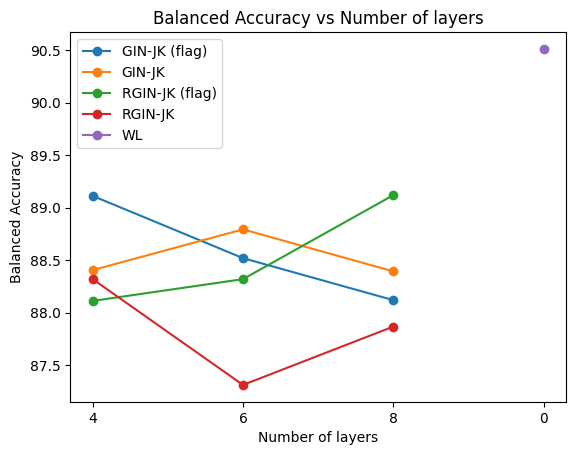

In [12]:
# Plotting the accuracy
fig, ax = plt.subplots()
# ax.set_prop_cycle('color', colors)
ax.set_xlabel("Number of layers")
ax.set_ylabel("Balanced Accuracy")
ax.set_title("Balanced Accuracy vs Number of layers")
# ax.set_ylim([85, 92])

ax.plot(ginjk_f_df_acc["num_layers"], ginjk_f_df_acc[metrics[1]], label="GIN-JK (flag)", marker="o", linestyle="-")
ax.plot(ginjk_acc["num_layers"], ginjk_acc[metrics[1]], label="GIN-JK", marker="o", linestyle="-")
ax.plot(rginjk_f_acc["num_layers"], rginjk_f_acc[metrics[1]], label="RGIN-JK (flag)", marker="o", linestyle="-")
ax.plot(rginjk_acc["num_layers"], rginjk_acc[metrics[1]], label="RGIN-JK", marker="o", linestyle="-")
ax.plot(wl_acc["num_layers"], wl_acc[metrics[1]], label="WL", marker="o", linestyle="-")
ax.legend()
plt.savefig("./src/output/gnn_eval/randgnn_eval_accuracy.png", dpi=300)
plt.show()


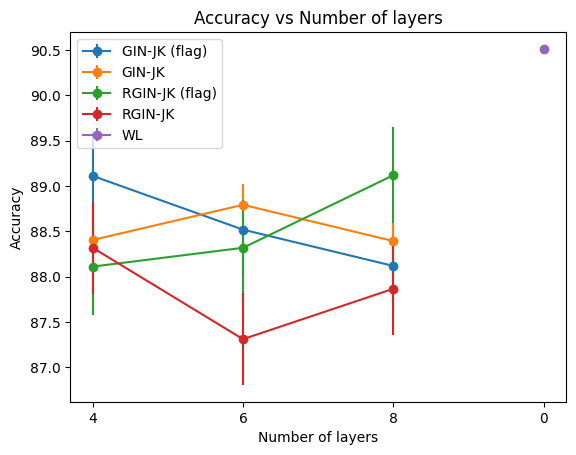

In [13]:
# Calculate the mean and standard deviation of the data
mean_values = ginjk_f_df_acc[metrics[1]], ginjk_acc[metrics[1]], rginjk_f_acc[metrics[1]], rginjk_acc[metrics[1]], wl_acc[metrics[1]]
std_values = ginjk_f_df_acc[metrics[1]].std(), ginjk_acc[metrics[1]].std(), rginjk_f_acc[metrics[1]].std(), rginjk_acc[metrics[1]].std(), wl_acc[metrics[1]].std()

# Plotting the accuracy
fig, ax = plt.subplots()
ax.set_xlabel("Number of layers")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy vs Number of layers")
# ax.set_ylim([85, 92])

# Use errorbar to add error bars for the standard deviation
ax.errorbar(ginjk_f_df_acc["num_layers"], mean_values[0], yerr=std_values[0], label="GIN-JK (flag)", marker="o", linestyle="-")
ax.errorbar(ginjk_acc["num_layers"], mean_values[1], yerr=std_values[1], label="GIN-JK", marker="o", linestyle="-")
ax.errorbar(rginjk_f_acc["num_layers"], mean_values[2], yerr=std_values[2], label="RGIN-JK (flag)", marker="o", linestyle="-")
ax.errorbar(rginjk_acc["num_layers"], mean_values[3], yerr=std_values[3], label="RGIN-JK", marker="o", linestyle="-")
ax.errorbar(wl_acc["num_layers"], mean_values[4], yerr=std_values[4], label="WL", marker="o", linestyle="-")

ax.legend()
plt.savefig("./src/output/gnn_eval/randgnn_eval_accuracy.png", dpi=300)
plt.show()

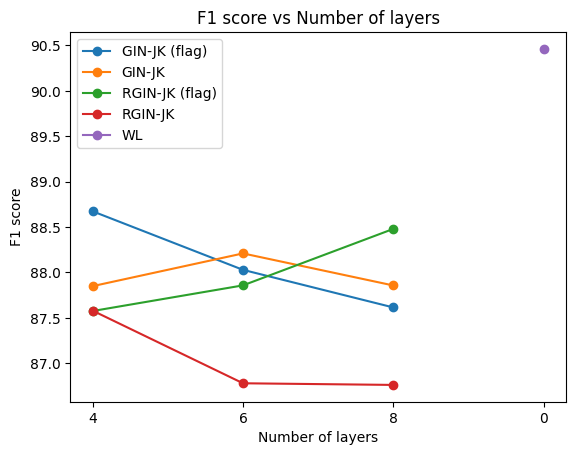

In [19]:
# Plotting f1 score
ginjk_f_df_f1 = ginjk_f_df.groupby(['method', 'num_layers'])[metrics[-1]].mean().reset_index()
ginjk_f_df_f1_std = ginjk_f_df.groupby(['method', 'num_layers'])[metrics[-1]].std().reset_index()
ginjk_df_f1 = ginjk_df.groupby(['method', 'num_layers'])[metrics[-1]].mean().reset_index()
ginjk_df_f1_std = ginjk_df.groupby(['method', 'num_layers'])[metrics[-1]].std().reset_index()
rginjk_f_df_f1 = rginjk_f_df.groupby(['method', 'num_layers'])[metrics[-1]].mean().reset_index()
rginjk_f_df_f1_std = rginjk_f_df.groupby(['method', 'num_layers'])[metrics[-1]].std().reset_index()
rginjk_df_f1 = rginjk_df.groupby(['method', 'num_layers'])[metrics[-1]].mean().reset_index()
rginjk_df_f1_std = rginjk_df.groupby(['method', 'num_layers'])[metrics[-1]].std().reset_index()
wl_df_f1 = wl_df.groupby(['method', 'num_layers'])[metrics[-1]].mean().reset_index()
wl_df_f1_std = wl_df.groupby(['method', 'num_layers'])[metrics[-1]].std().reset_index()

fig, ax = plt.subplots()
ax.set_xlabel("Number of layers")
ax.set_ylabel("F1 score")
ax.set_title("F1 score vs Number of layers")
# ax.set_ylim([85, 92])

# ax.errorbar(ginjk_f_df_f1["num_layers"], ginjk_f_df_f1[metrics[-1]], yerr=ginjk_f_df_f1_std[metrics[-1]], label="GIN-JK (flag)", marker="o", linestyle="-")
# ax.errorbar(ginjk_df_f1["num_layers"], ginjk_df_f1[metrics[-1]], yerr=ginjk_df_f1_std[metrics[-1]], label="GIN-JK", marker="o", linestyle="-")
# ax.errorbar(rginjk_f_df_f1["num_layers"], rginjk_f_df_f1[metrics[-1]], yerr=rginjk_f_df_f1_std[metrics[-1]], label="RGIN-JK (flag)", marker="o", linestyle="-")
# ax.errorbar(rginjk_df_f1["num_layers"], rginjk_df_f1[metrics[-1]], yerr=rginjk_df_f1_std[metrics[-1]], label="RGIN-JK", marker="o", linestyle="-")
# ax.errorbar(wl_df_f1["num_layers"], wl_df_f1[metrics[-1]], yerr=wl_df_f1_std[metrics[-1]], label="WL", marker="o", linestyle="-")
ax.plot(ginjk_f_df_f1["num_layers"], ginjk_f_df_f1[metrics[-1]], label="GIN-JK (flag)", marker="o", linestyle="-")
ax.plot(ginjk_df_f1["num_layers"], ginjk_df_f1[metrics[-1]], label="GIN-JK", marker="o", linestyle="-")
ax.plot(rginjk_f_df_f1["num_layers"], rginjk_f_df_f1[metrics[-1]], label="RGIN-JK (flag)", marker="o", linestyle="-")
ax.plot(rginjk_df_f1["num_layers"], rginjk_df_f1[metrics[-1]], label="RGIN-JK", marker="o", linestyle="-")
ax.plot(wl_df_f1["num_layers"], wl_df_f1[metrics[-1]], label="WL", marker="o", linestyle="-")

ax.legend()
plt.savefig("./src/output/gnn_eval/randgnn_eval_f1.png", dpi=300)
plt.show()


  method num_layers  traning_time
0   CDFS          4   2250.866667
1   CDFS          6   3250.500667
2   CDFS          8   4260.012667
  method num_layers  traning_time
0   CDFS          4    903.255714
1   CDFS          6   1274.352667
2   CDFS          8   1652.500667
  method num_layers  traning_time
0   CDFS          4   2154.284000
1   CDFS          6   3901.365333
2   CDFS          8   5507.881333
  method num_layers  traning_time
0   CDFS          4    832.655333
1   CDFS          6   1473.270000
2   CDFS          8   2059.984000
  method num_layers  traning_time
0   CDFS          0         7.742


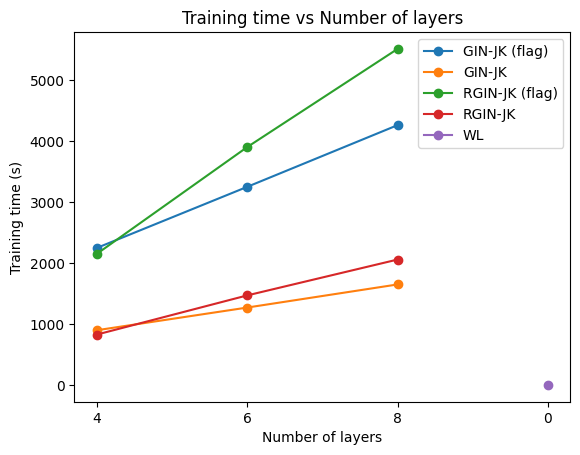

In [29]:
# Plotting training time
ginjk_f_df_time = ginjk_f_df.groupby(['method', 'num_layers'])["traning_time"].mean().reset_index()
ginjk_df_time = ginjk_df.groupby(['method', 'num_layers'])["traning_time"].mean().reset_index()
rginjk_f_df_time = rginjk_f_df.groupby(['method', 'num_layers'])["traning_time"].mean().reset_index()
rginjk_df_time = rginjk_df.groupby(['method', 'num_layers'])["traning_time"].mean().reset_index()
wl_df_time = wl_df.groupby(['method', 'num_layers'])["traning_time"].mean().reset_index()
ginjk_f_df_time_std = ginjk_f_df.groupby(['method', 'num_layers'])["traning_time"].std().reset_index()
ginjk_df_time_std = ginjk_df.groupby(['method', 'num_layers'])["traning_time"].std().reset_index()
rginjk_f_df_time_std = rginjk_f_df.groupby(['method', 'num_layers'])["traning_time"].std().reset_index()
rginjk_df_time_std = rginjk_df.groupby(['method', 'num_layers'])["traning_time"].std().reset_index()
wl_df_time_std = wl_df.groupby(['method', 'num_layers'])["traning_time"].std().reset_index()


print(ginjk_f_df_time)
print(ginjk_df_time)
print(rginjk_f_df_time)
print(rginjk_df_time)
print(wl_df_time)

fig, ax = plt.subplots()
ax.set_xlabel("Number of layers")
ax.set_ylabel("Training time (s)")
ax.set_title("Training time vs Number of layers")
# ax.set_ylim([85, 92])

# ax.errorbar(ginjk_f_df_time["num_layers"], ginjk_f_df_time["traning_time"], yerr=ginjk_f_df_time_std["traning_time"], label="GIN-JK (flag)", marker="o", linestyle="-")
# ax.errorbar(ginjk_df_time["num_layers"], ginjk_df_time["traning_time"], yerr=ginjk_df_time_std["traning_time"], label="GIN-JK", marker="o", linestyle="-")
# ax.errorbar(rginjk_f_df_time["num_layers"], rginjk_f_df_time["traning_time"], yerr=rginjk_f_df_time_std["traning_time"], label="RGIN-JK (flag)", marker="o", linestyle="-")
# ax.errorbar(rginjk_df_time["num_layers"], rginjk_df_time["traning_time"], yerr=rginjk_df_time_std["traning_time"], label="RGIN-JK", marker="o", linestyle="-")
# ax.errorbar(wl_df_time["num_layers"], wl_df_time["traning_time"], yerr=wl_df_time_std["traning_time"], label="WL", marker="o", linestyle="-")


ax.plot(ginjk_f_df_time["num_layers"], ginjk_f_df_time["traning_time"], label="GIN-JK (flag)", marker="o", linestyle="-")
ax.plot(ginjk_df_time["num_layers"], ginjk_df_time["traning_time"], label="GIN-JK", marker="o", linestyle="-")
ax.plot(rginjk_f_df_time["num_layers"], rginjk_f_df_time["traning_time"], label="RGIN-JK (flag)", marker="o", linestyle="-")
ax.plot(rginjk_df_time["num_layers"], rginjk_df_time["traning_time"], label="RGIN-JK", marker="o", linestyle="-")
ax.plot(wl_df_time["num_layers"], wl_df_time["traning_time"], label="WL", marker="o", linestyle="-")

ax.legend()
plt.savefig("./src/output/gnn_eval/randgnn_eval_training_time.png", dpi=300)
plt.show()

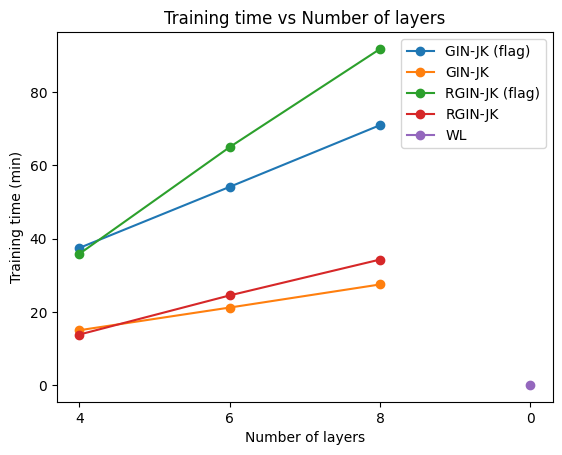

In [22]:
# Plotting training time in minutes
fig, ax = plt.subplots()
ax.set_xlabel("Number of layers")
ax.set_ylabel("Training time (min)")
ax.set_title("Training time vs Number of layers")
# ax.set_ylim([85, 92])

ax.plot(ginjk_f_df_time["num_layers"], ginjk_f_df_time["traning_time"]/60, label="GIN-JK (flag)", marker="o", linestyle="-")
ax.plot(ginjk_df_time["num_layers"], ginjk_df_time["traning_time"]/60, label="GIN-JK", marker="o", linestyle="-")
ax.plot(rginjk_f_df_time["num_layers"], rginjk_f_df_time["traning_time"]/60, label="RGIN-JK (flag)", marker="o", linestyle="-")
ax.plot(rginjk_df_time["num_layers"], rginjk_df_time["traning_time"]/60, label="RGIN-JK", marker="o", linestyle="-")
ax.plot(wl_df_time["num_layers"], wl_df_time["traning_time"]/60, label="WL", marker="o", linestyle="-")

ax.legend()
plt.savefig("./src/output/gnn_eval/randgnn_eval_training_time_min.png", dpi=300)
plt.show()

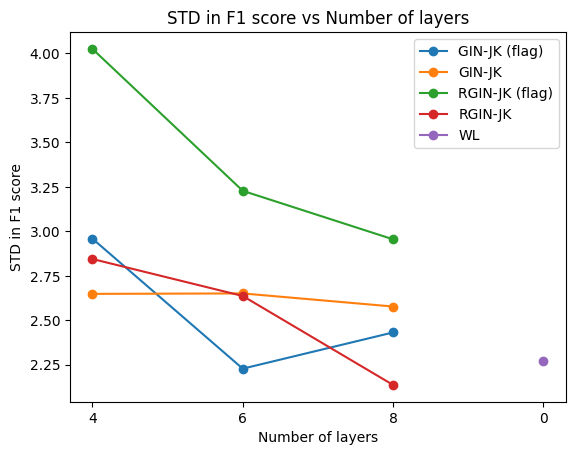

In [24]:
# Plotting std f1 score
ginjk_f_df_f1 = ginjk_f_df.groupby(['method', 'num_layers'])[metrics[-1]].mean().reset_index()
ginjk_f_df_f1_std = ginjk_f_df.groupby(['method', 'num_layers'])[metrics[-1]].std().reset_index()
ginjk_df_f1 = ginjk_df.groupby(['method', 'num_layers'])[metrics[-1]].mean().reset_index()
ginjk_df_f1_std = ginjk_df.groupby(['method', 'num_layers'])[metrics[-1]].std().reset_index()
rginjk_f_df_f1 = rginjk_f_df.groupby(['method', 'num_layers'])[metrics[-1]].mean().reset_index()
rginjk_f_df_f1_std = rginjk_f_df.groupby(['method', 'num_layers'])[metrics[-1]].std().reset_index()
rginjk_df_f1 = rginjk_df.groupby(['method', 'num_layers'])[metrics[-1]].mean().reset_index()
rginjk_df_f1_std = rginjk_df.groupby(['method', 'num_layers'])[metrics[-1]].std().reset_index()
wl_df_f1 = wl_df.groupby(['method', 'num_layers'])[metrics[-1]].mean().reset_index()
wl_df_f1_std = wl_df.groupby(['method', 'num_layers'])[metrics[-1]].std().reset_index()

fig, ax = plt.subplots()
ax.set_xlabel("Number of layers")
ax.set_ylabel("STD in F1 score")
ax.set_title("STD in F1 score vs Number of layers")
# ax.set_ylim([85, 92])

# ax.errorbar(ginjk_f_df_f1["num_layers"], ginjk_f_df_f1[metrics[-1]], yerr=ginjk_f_df_f1_std[metrics[-1]], label="GIN-JK (flag)", marker="o", linestyle="-")
# ax.errorbar(ginjk_df_f1["num_layers"], ginjk_df_f1[metrics[-1]], yerr=ginjk_df_f1_std[metrics[-1]], label="GIN-JK", marker="o", linestyle="-")
# ax.errorbar(rginjk_f_df_f1["num_layers"], rginjk_f_df_f1[metrics[-1]], yerr=rginjk_f_df_f1_std[metrics[-1]], label="RGIN-JK (flag)", marker="o", linestyle="-")
# ax.errorbar(rginjk_df_f1["num_layers"], rginjk_df_f1[metrics[-1]], yerr=rginjk_df_f1_std[metrics[-1]], label="RGIN-JK", marker="o", linestyle="-")
# ax.errorbar(wl_df_f1["num_layers"], wl_df_f1[metrics[-1]], yerr=wl_df_f1_std[metrics[-1]], label="WL", marker="o", linestyle="-")
ax.plot(ginjk_f_df_f1["num_layers"], ginjk_f_df_f1_std[metrics[-1]], label="GIN-JK (flag)", marker="o", linestyle="-")
ax.plot(ginjk_df_f1["num_layers"], ginjk_df_f1_std[metrics[-1]], label="GIN-JK", marker="o", linestyle="-")
ax.plot(rginjk_f_df_f1["num_layers"], rginjk_f_df_f1_std[metrics[-1]], label="RGIN-JK (flag)", marker="o", linestyle="-")
ax.plot(rginjk_df_f1["num_layers"], rginjk_df_f1_std[metrics[-1]], label="RGIN-JK", marker="o", linestyle="-")
ax.plot(wl_df_f1["num_layers"], wl_df_f1_std[metrics[-1]], label="WL", marker="o", linestyle="-")

ax.legend()
plt.savefig("./src/output/gnn_eval/randgnn_eval_f1_std.png", dpi=300)
plt.show()


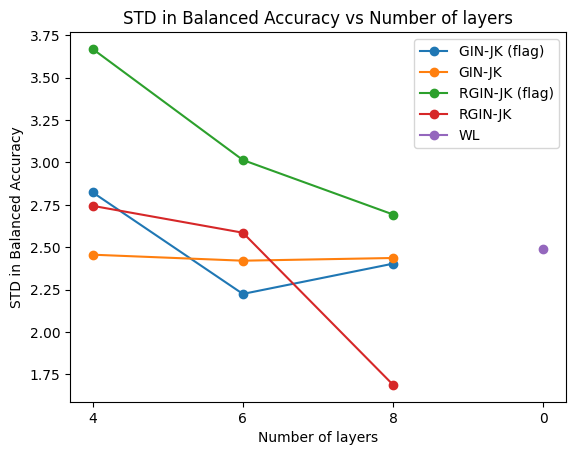

In [26]:
# Plotting std accuracy
ginjk_f_df_acc = ginjk_f_df.groupby(['method', 'num_layers'])[metrics[1]].mean().reset_index()
ginjk_f_df_acc_std = ginjk_f_df.groupby(['method', 'num_layers'])[metrics[1]].std().reset_index()
ginjk_df_acc = ginjk_df.groupby(['method', 'num_layers'])[metrics[1]].mean().reset_index()
ginjk_df_acc_std = ginjk_df.groupby(['method', 'num_layers'])[metrics[1]].std().reset_index()
rginjk_f_df_acc = rginjk_f_df.groupby(['method', 'num_layers'])[metrics[1]].mean().reset_index()
rginjk_f_df_acc_std = rginjk_f_df.groupby(['method', 'num_layers'])[metrics[1]].std().reset_index()
rginjk_df_acc = rginjk_df.groupby(['method', 'num_layers'])[metrics[1]].mean().reset_index()
rginjk_df_acc_std = rginjk_df.groupby(['method', 'num_layers'])[metrics[1]].std().reset_index()
wl_df_acc = wl_df.groupby(['method', 'num_layers'])[metrics[1]].mean().reset_index()
wl_df_acc_std = wl_df.groupby(['method', 'num_layers'])[metrics[1]].std().reset_index()

fig, ax = plt.subplots()
ax.set_xlabel("Number of layers")
ax.set_ylabel("STD in Balanced Accuracy")

ax.set_title("STD in Balanced Accuracy vs Number of layers")
# ax.set_ylim([85, 92])

# ax.errorbar(ginjk_f_df_acc["num_layers"], ginjk_f_df_acc[metrics[1]], yerr=ginjk_f_df_acc_std[metrics[1]], label="GIN-JK (flag)", marker="o", linestyle="-")
# ax.errorbar(ginjk_df_acc["num_layers"], ginjk_df_acc[metrics[1]], yerr=ginjk_df_acc_std[metrics[1]], label="GIN-JK", marker="o", linestyle="-")
# ax.errorbar(rginjk_f_df_acc["num_layers"], rginjk_f_df_acc[metrics[1]], yerr=rginjk_f_df_acc_std[metrics[1]], label="RGIN-JK (flag)", marker="o", linestyle="-")
# ax.errorbar(rginjk_df_acc["num_layers"], rginjk_df_acc[metrics[1]], yerr=rginjk_df_acc_std[metrics[1]], label="RGIN-JK", marker="o", linestyle="-")
# ax.errorbar(wl_df_acc["num_layers"], wl_df_acc[metrics[1]], yerr=wl_df_acc_std[metrics[1]], label="WL", marker="o", linestyle="-")
ax.plot(ginjk_f_df_acc["num_layers"], ginjk_f_df_acc_std[metrics[1]], label="GIN-JK (flag)", marker="o", linestyle="-")
ax.plot(ginjk_df_acc["num_layers"], ginjk_df_acc_std[metrics[1]], label="GIN-JK", marker="o", linestyle="-")
ax.plot(rginjk_f_df_acc["num_layers"], rginjk_f_df_acc_std[metrics[1]], label="RGIN-JK (flag)", marker="o", linestyle="-")
ax.plot(rginjk_df_acc["num_layers"], rginjk_df_acc_std[metrics[1]], label="RGIN-JK", marker="o", linestyle="-")
ax.plot(wl_df_acc["num_layers"], wl_df_acc_std[metrics[1]], label="WL", marker="o", linestyle="-")

ax.legend()
plt.savefig("./src/output/gnn_eval/randgnn_eval_accuracy_std.png", dpi=300)
plt.show()